<h3 align="center">Bitcoin price forecasting</h3> 
<h3 align="center">Jonatas Aguiar</h3>
<h3 align="center"></h3> 
<h3 align="center">AML 2103_2 – Visualization for AI and ML</h3> 
<h3 align="center">Instructor: Farzad Amirjavid</h3> 
<h3 align="center"></h3> 
<h3 align="center">April 25, 2021</h3> 
<h3 align="center"></h3> 










## Forecast the future 14 days of bitcoin price after the date April 05. 

# 1. Loading Bitcoin dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

In [ ]:
df = pd.read_csv('/content/drive/My Drive/DV_final_assignment/Bitcoin.csv')
df

,Date,Price
0,12-Mar-20,"4,826.00"
1,13-Mar-20,"5,584.30"
2,14-Mar-20,"5,182.70"
3,15-Mar-20,"5,366.30"
4,16-Mar-20,"5,030.00"
...,...,...
385,01-Apr-21,"58,718.30"
386,02-Apr-21,"58,977.30"
387,03-Apr-21,"57,059.90"
388,04-Apr-21,"58,199.90"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    390 non-null    object
 1   Price   390 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [ ]:
df.shape

(390, 2)

# 2. Gaussian Process Regression

According to Lubbe [1], probabilistic modelling, which falls under the Bayesian paradigm, has powerful capabilities, such as giving a reliable estimation of its uncertainty. That makes the Gaussian process regression a powerful tool when applied in the data science field.

Duvenaud [2] states that defining the kernel and its parameters 'remains a black art', making it extremely difficult to find the correct kernels and parameter to the question at hand. 

The most widely used kernel is the squared exponential (SE) kernel function.  The SE kernel is the de-facto default kernel for Gaussian processes [3].

Despite the difficulty, Duvenaud [2] demonstrated which kind of results one could get when using compound Kernels. They are described in the picture below.

Compound Kernels

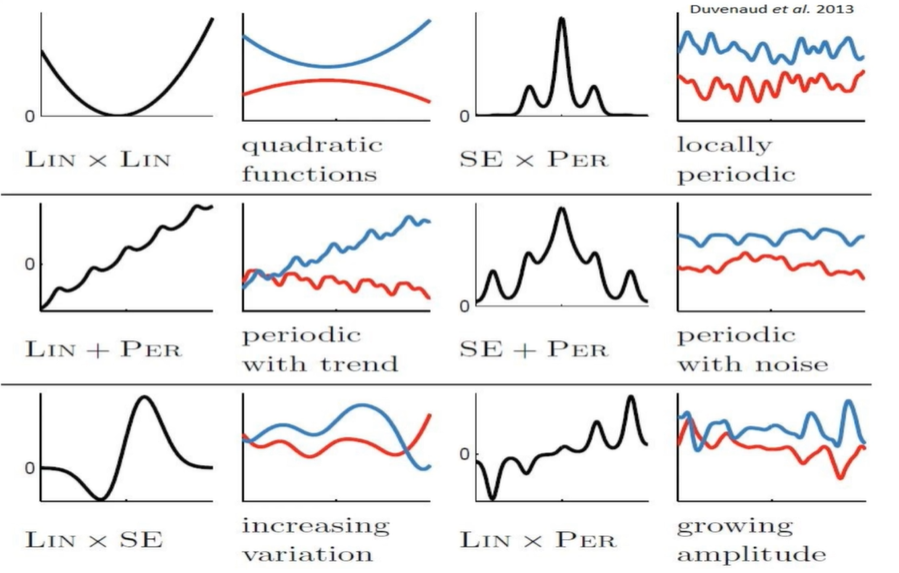

For this section, we took the following steps:
 - try different kernels
 - take the most reasonable result
 - run different parameters and find the most reasonable ones
 - parameters fine-tuning

The code below runs 6 different Kernels. Kernels 3, 4, and 5 are compound kernels.

For each kernel, we also iterate the random state value from 0 to 8.

Random:  0


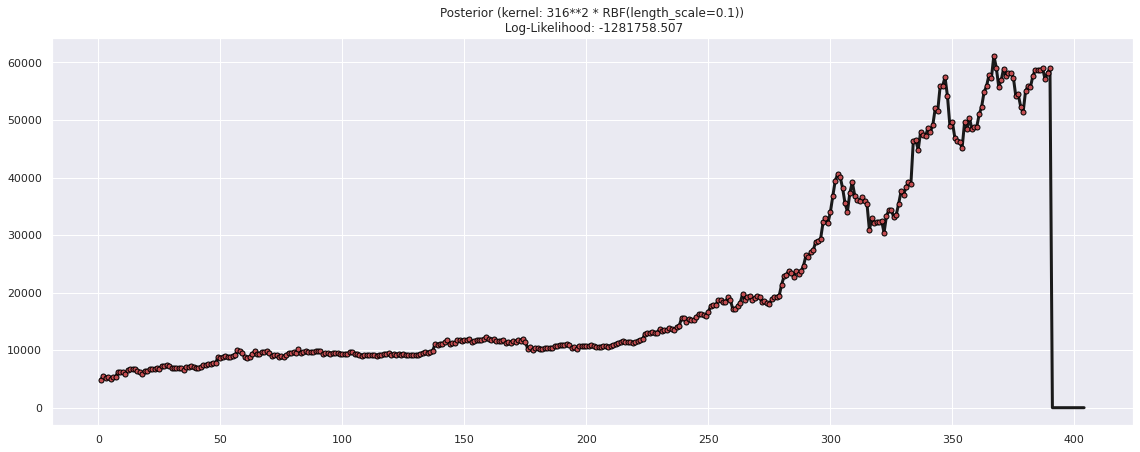

Random:  1


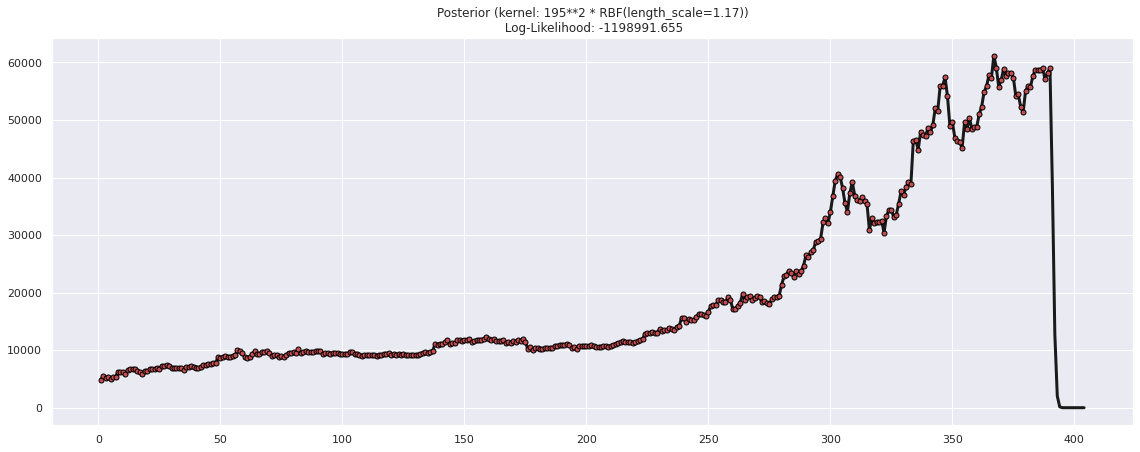

Random:  2


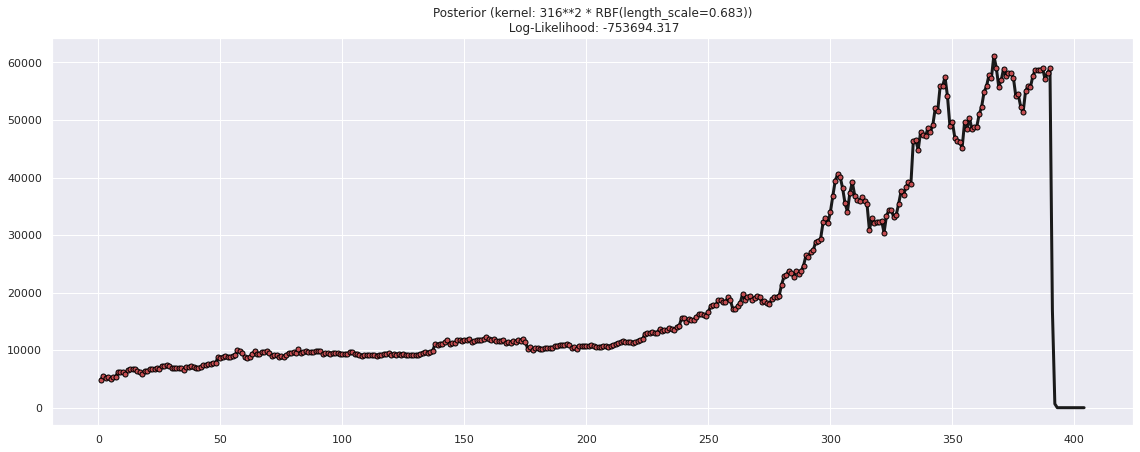

Random:  3


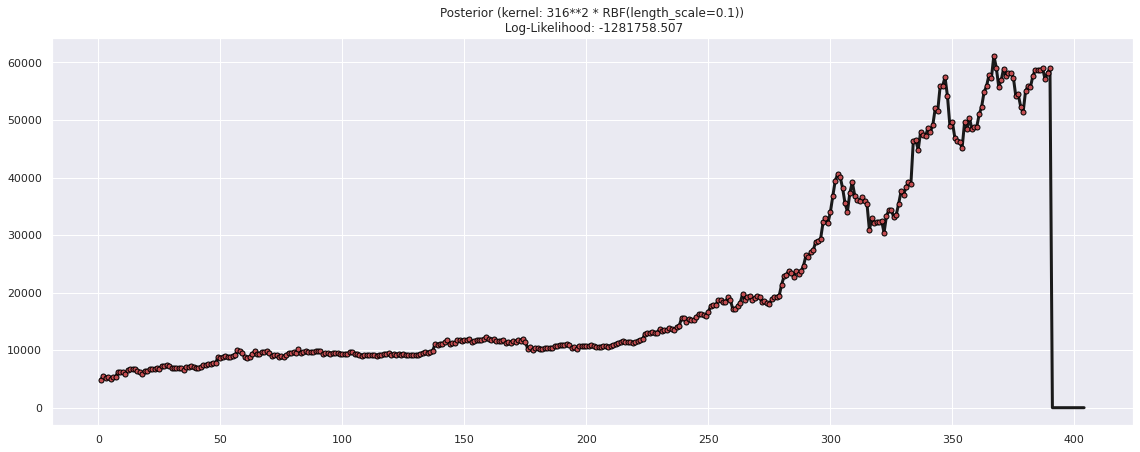

Random:  4


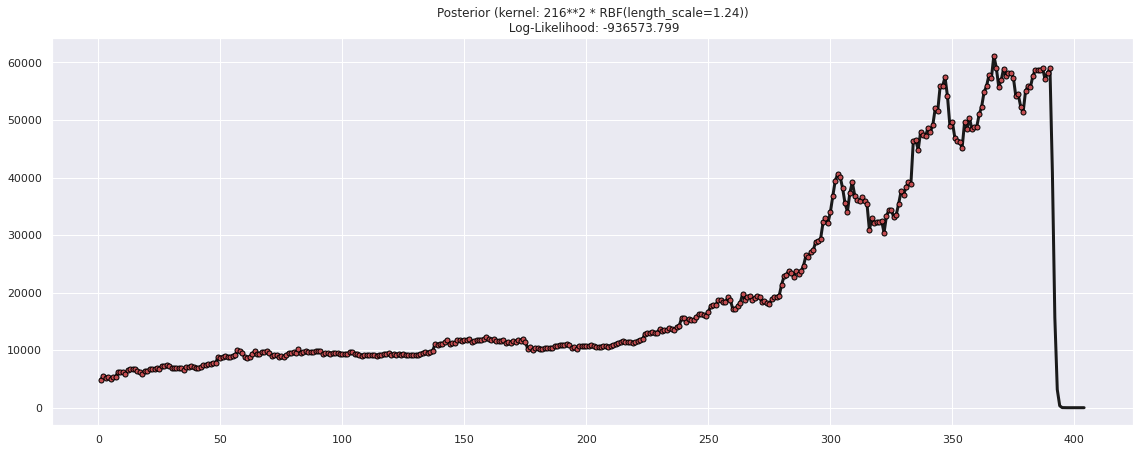

Random:  5


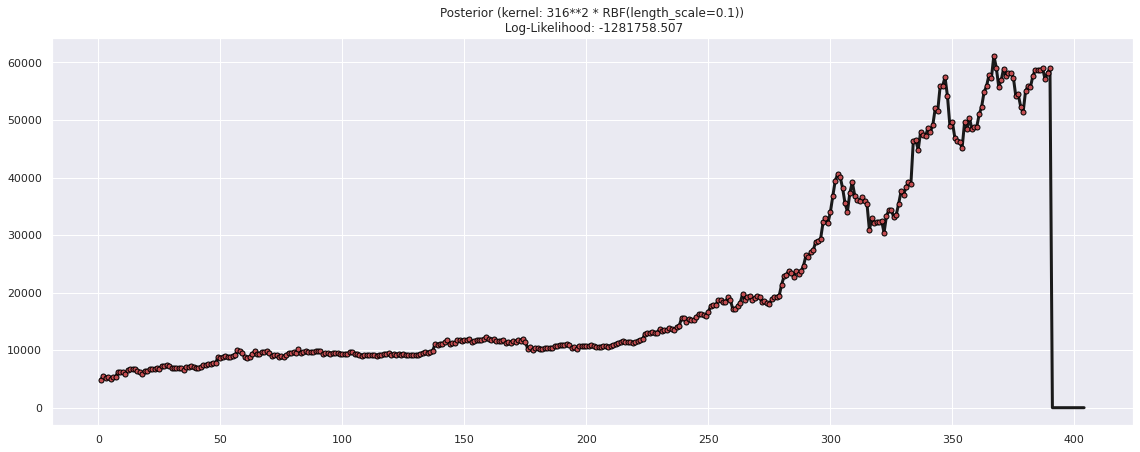

Random:  0


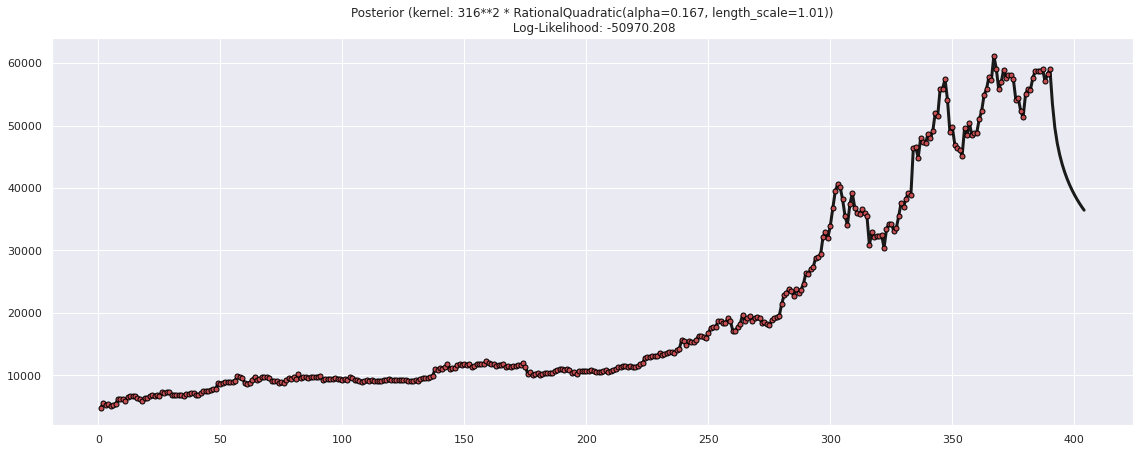

Random:  1


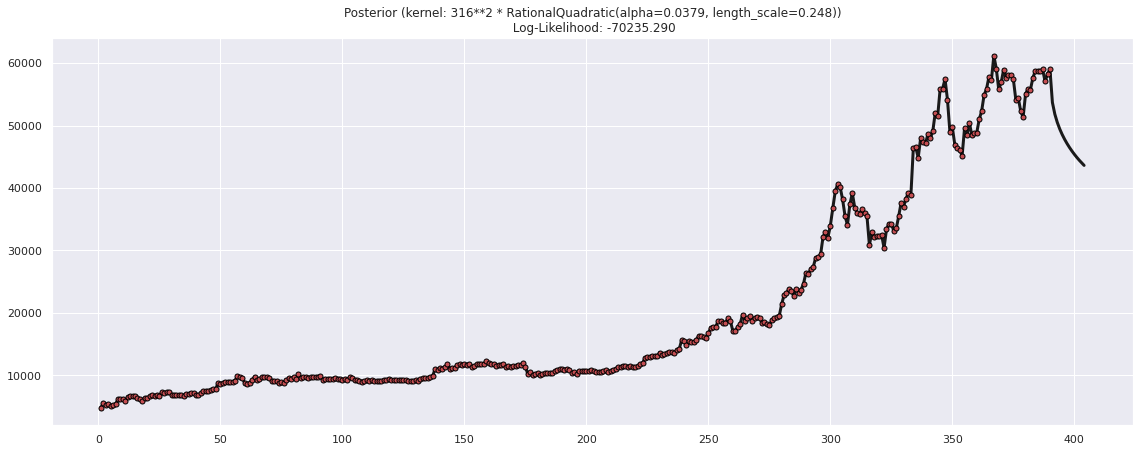

Random:  2


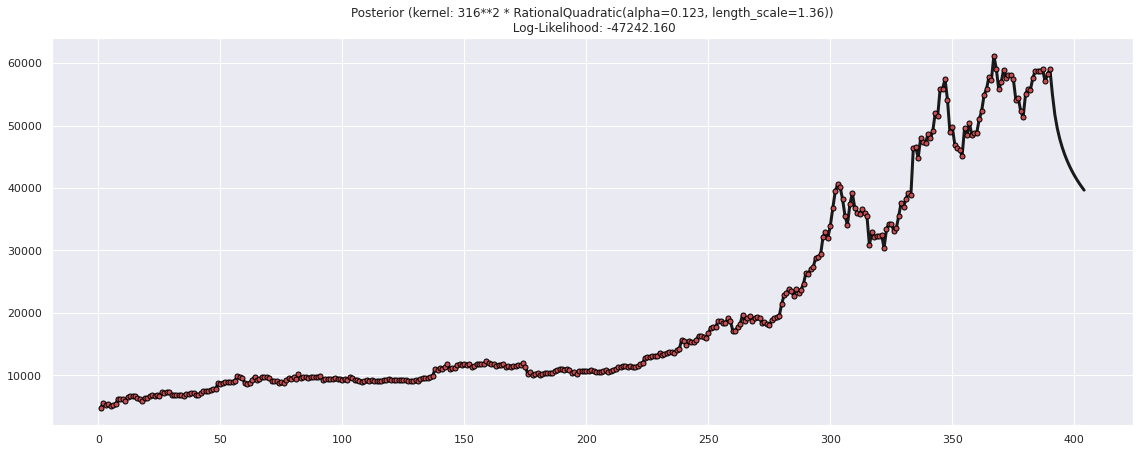

Random:  3


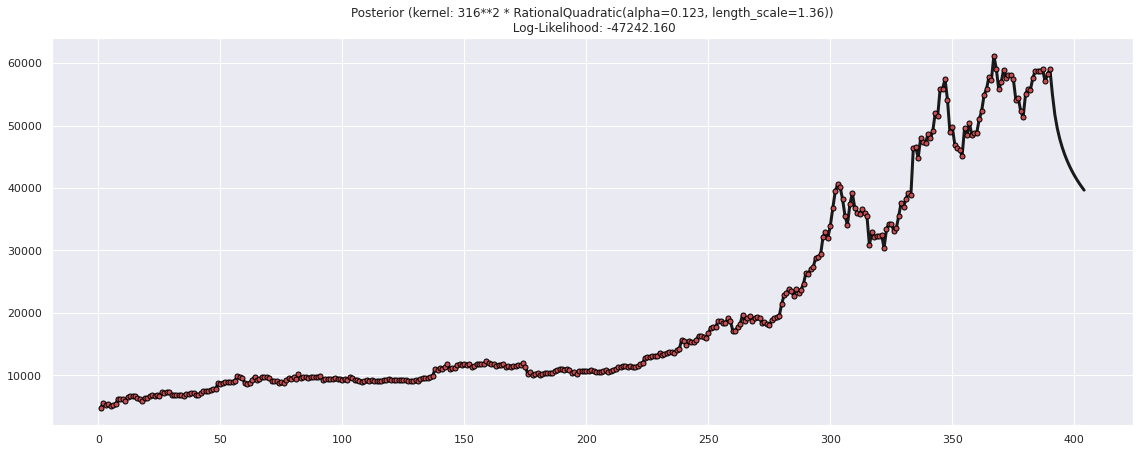

Random:  4


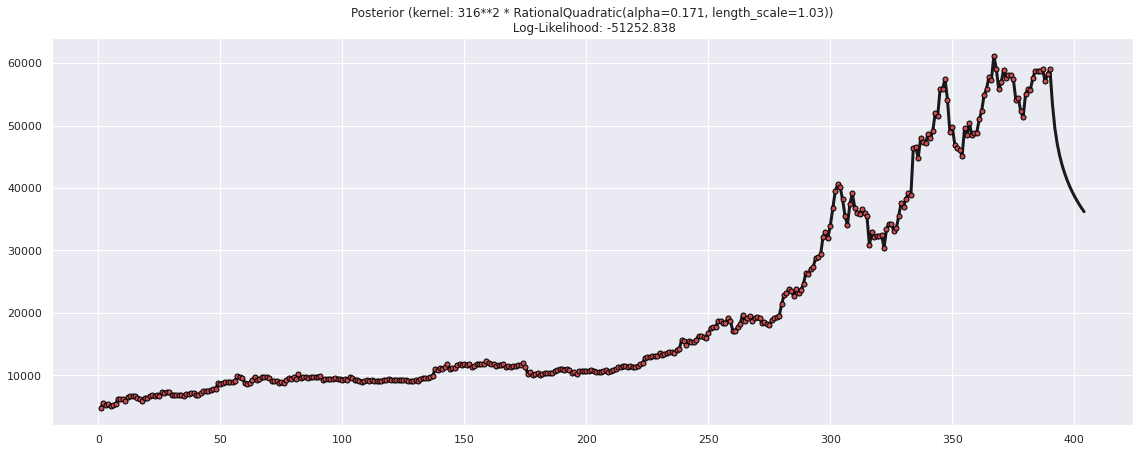

Random:  5


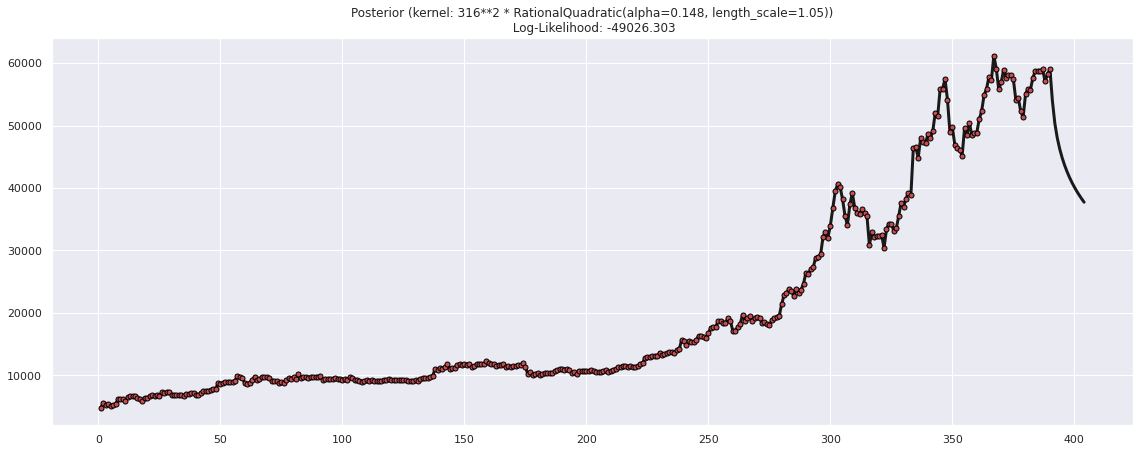

Random:  0


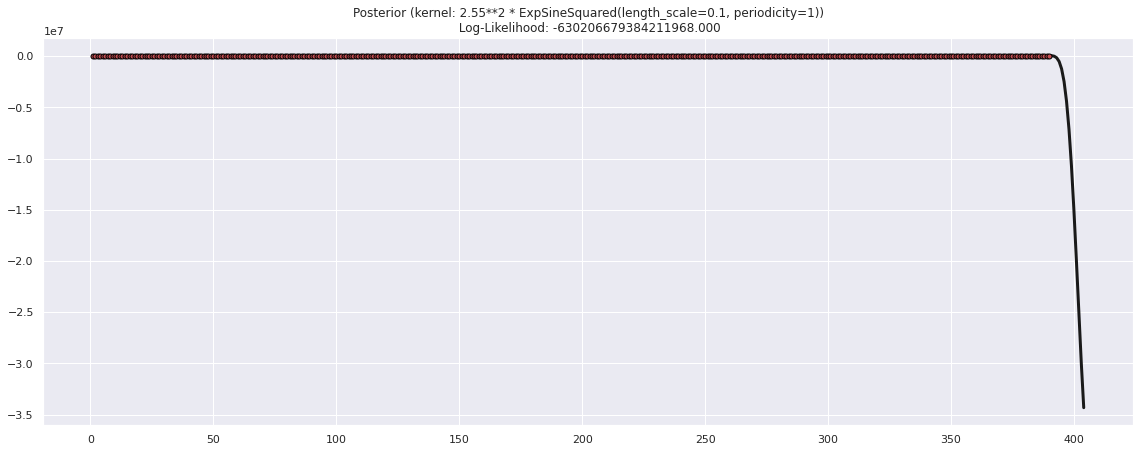

Random:  1


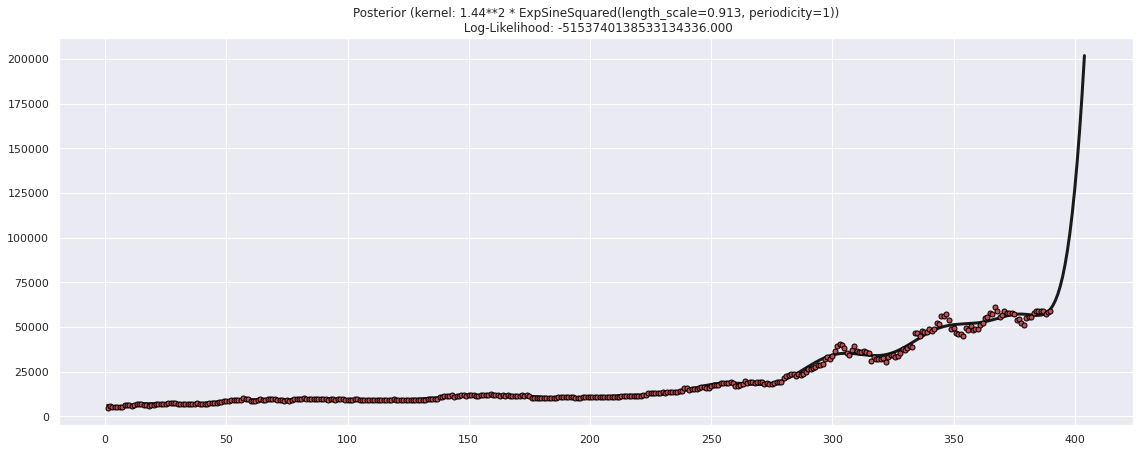

Random:  2


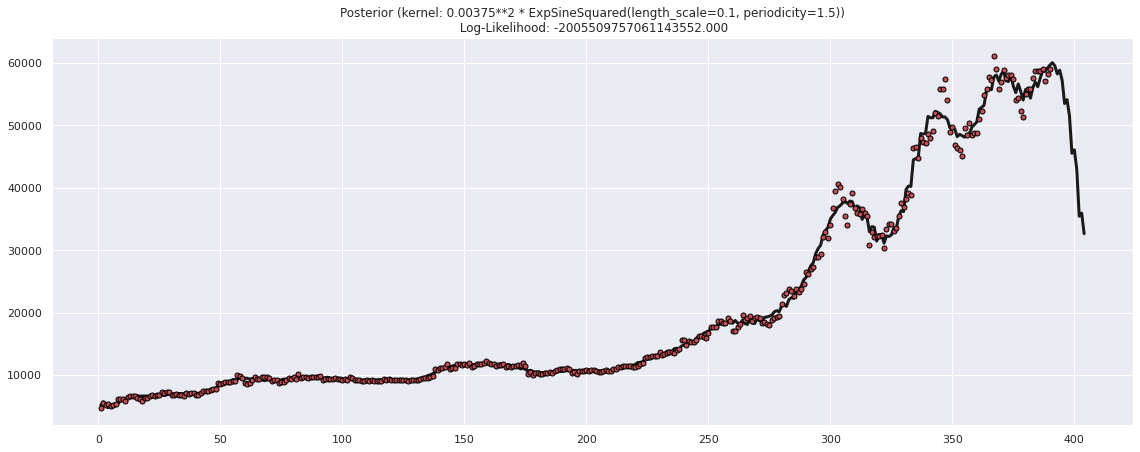

Random:  3


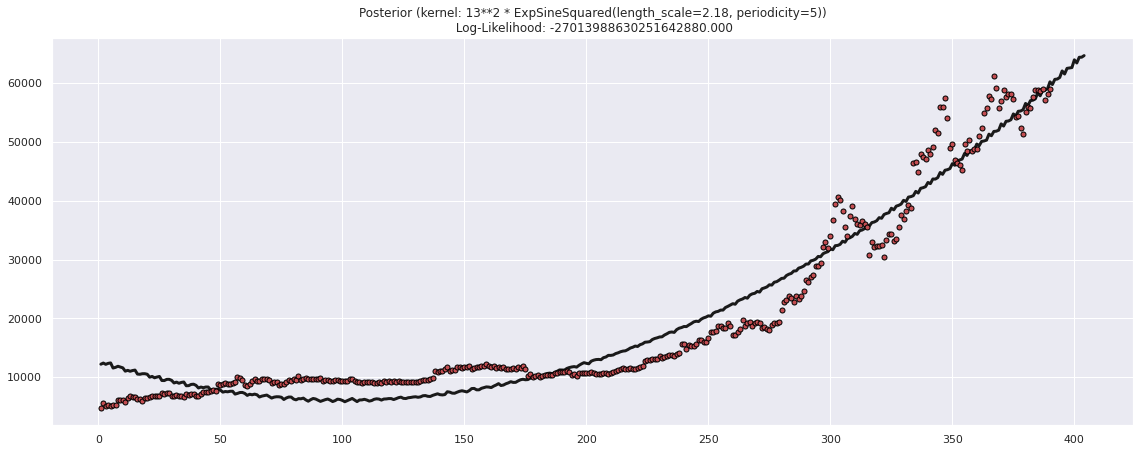

Random:  4


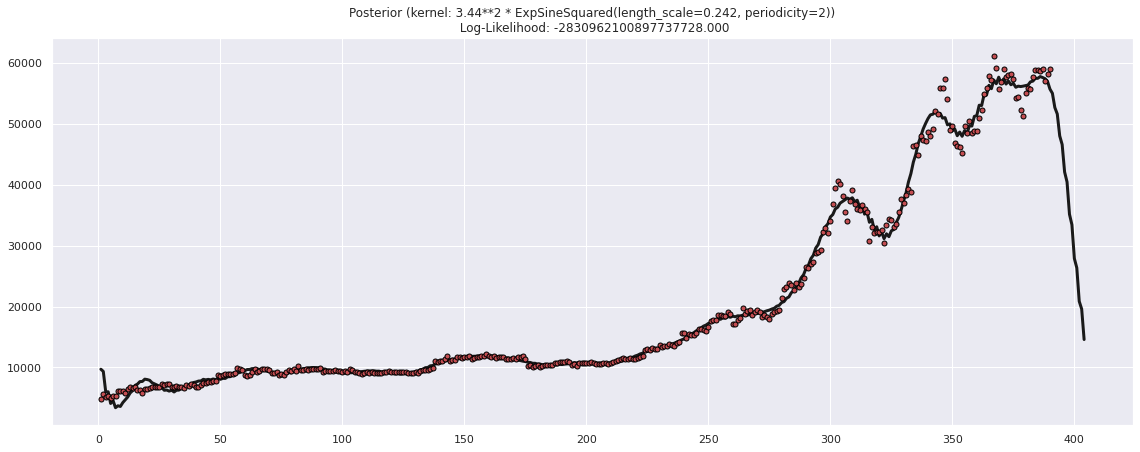

Random:  5


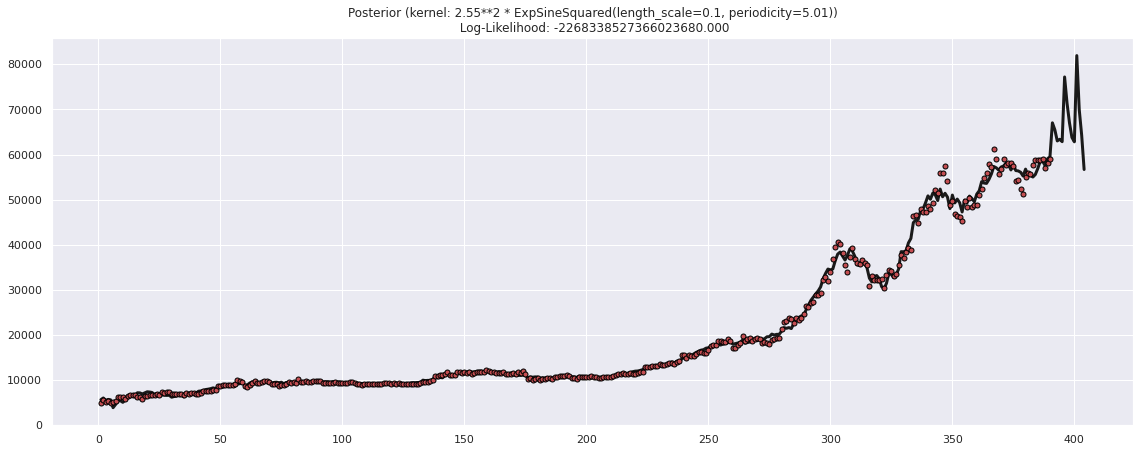

Random:  0


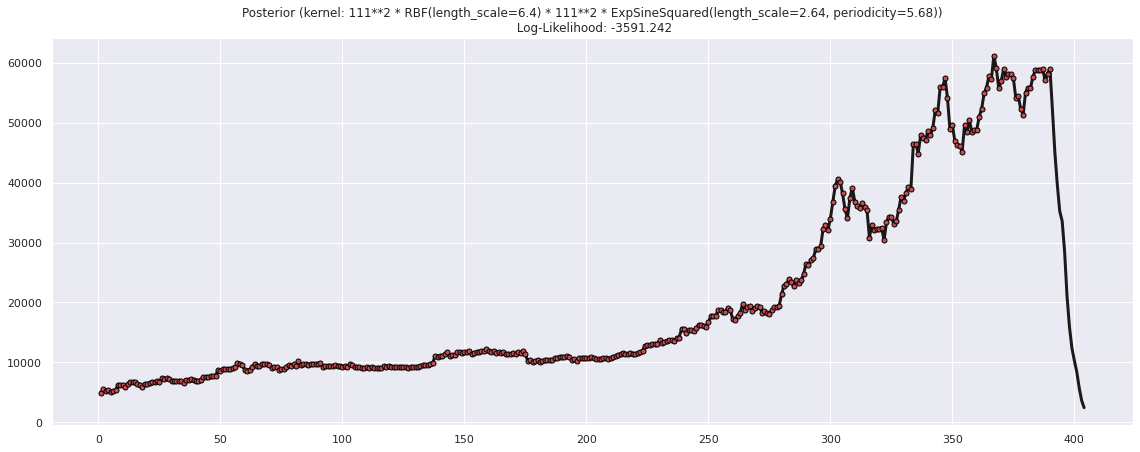

Random:  1


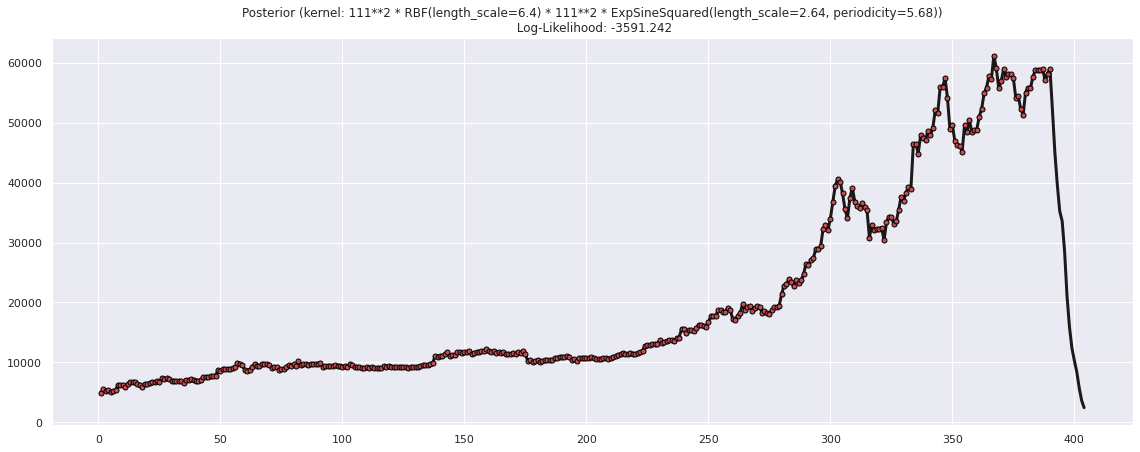

Random:  2


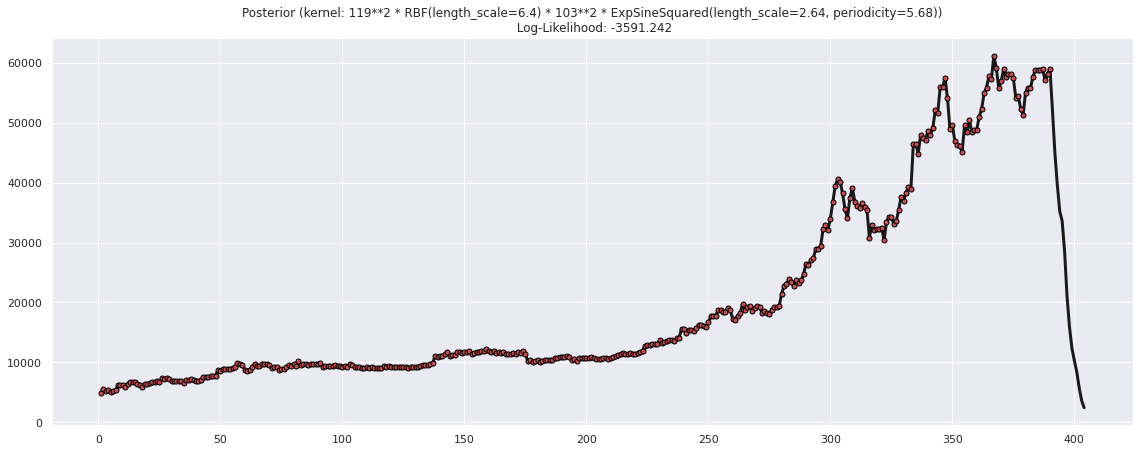

Random:  3


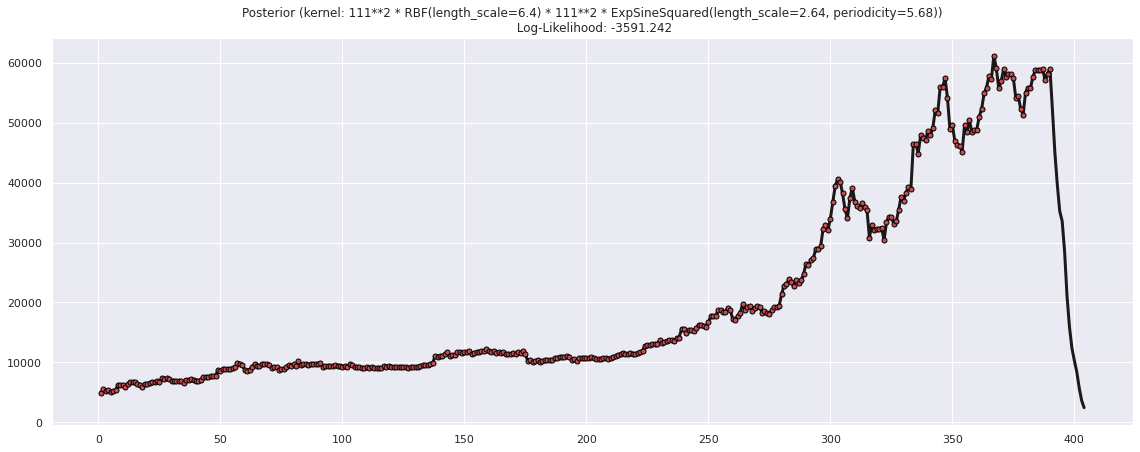

Random:  4


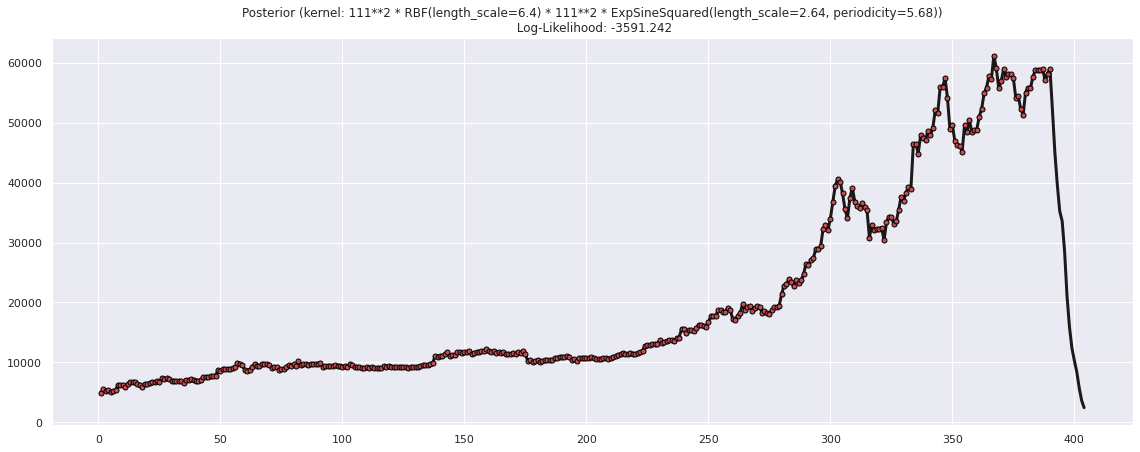

Random:  5


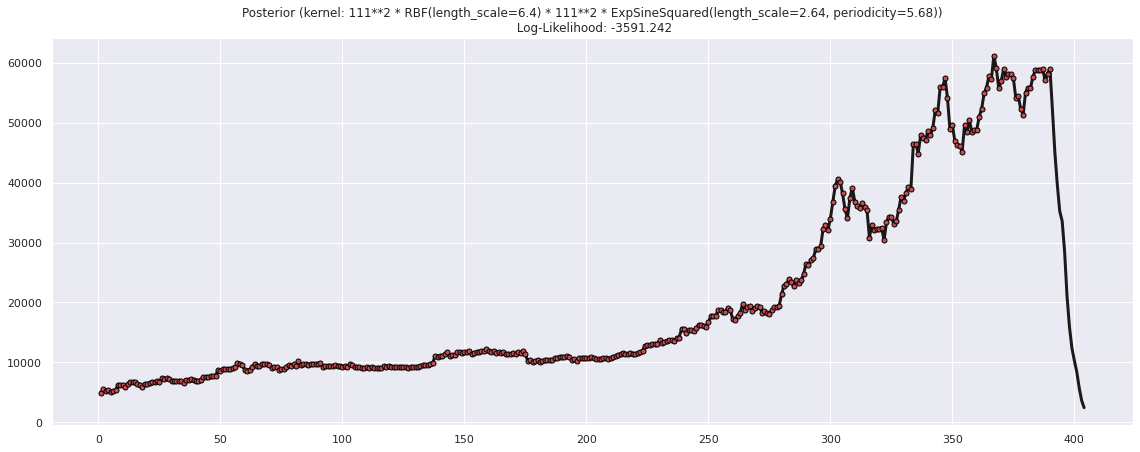

Random:  0


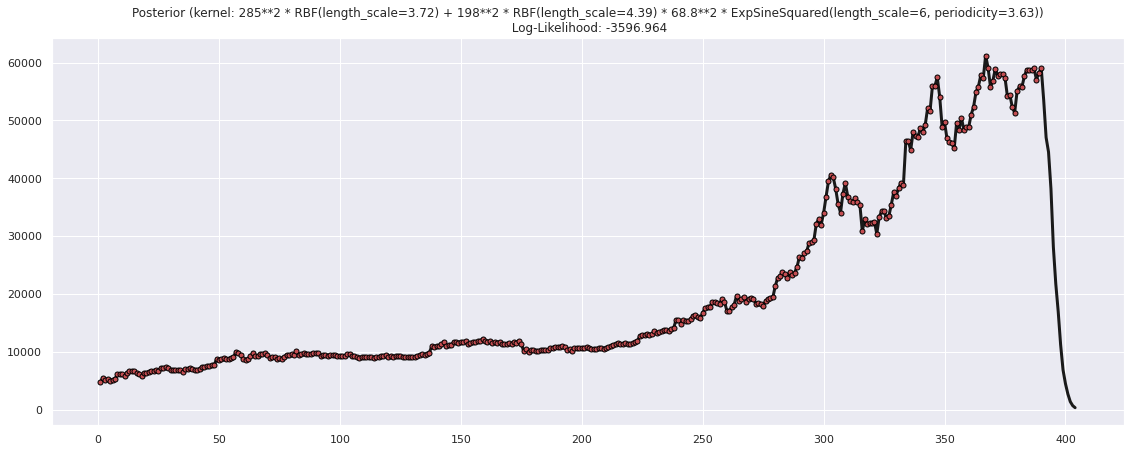

Random:  1


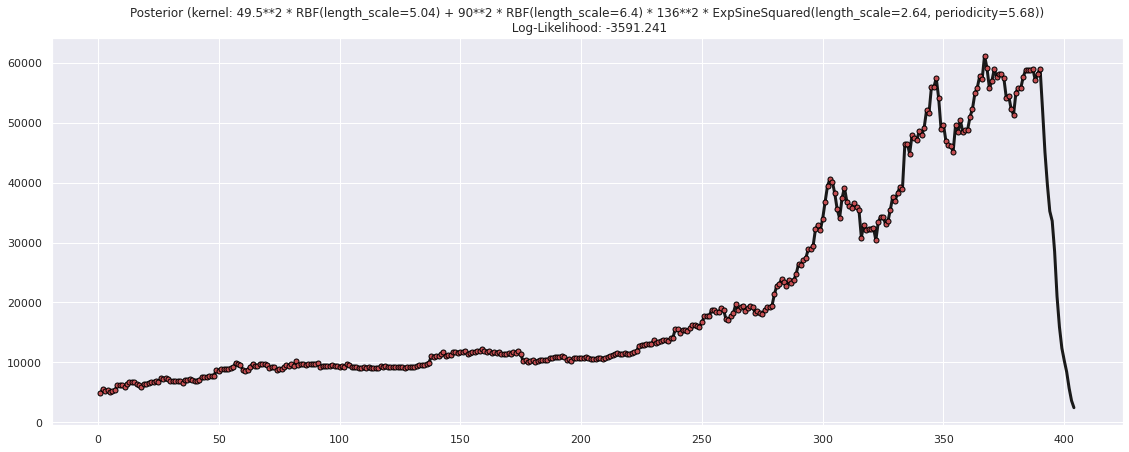

Random:  2


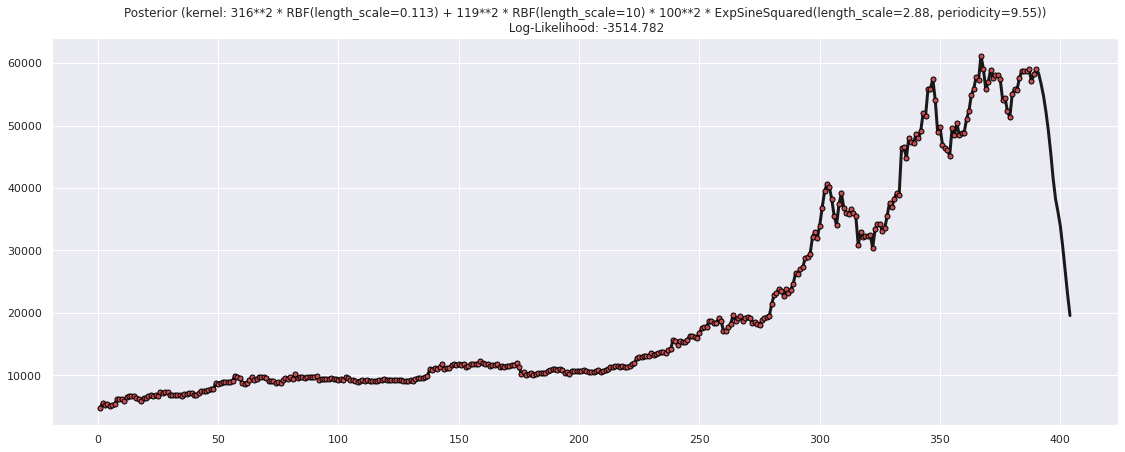

Random:  3


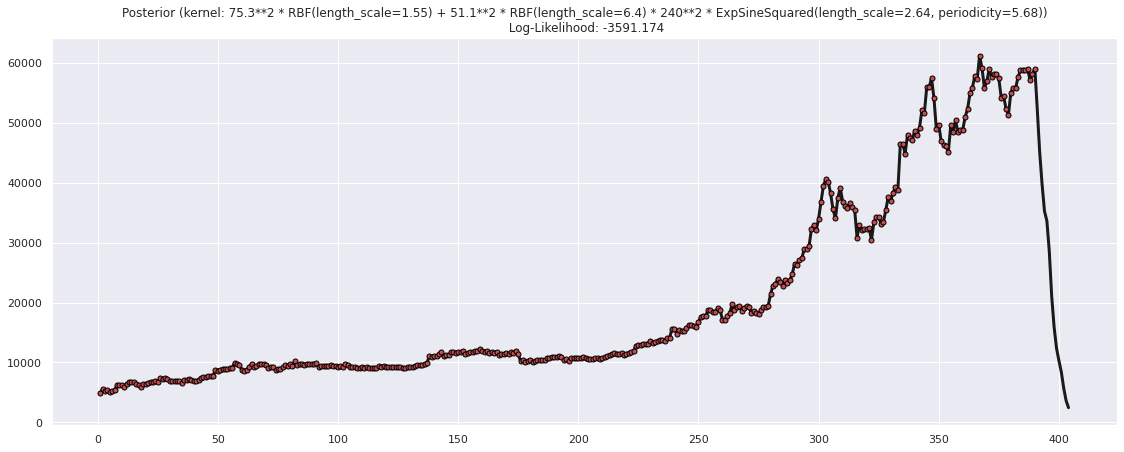

Random:  4


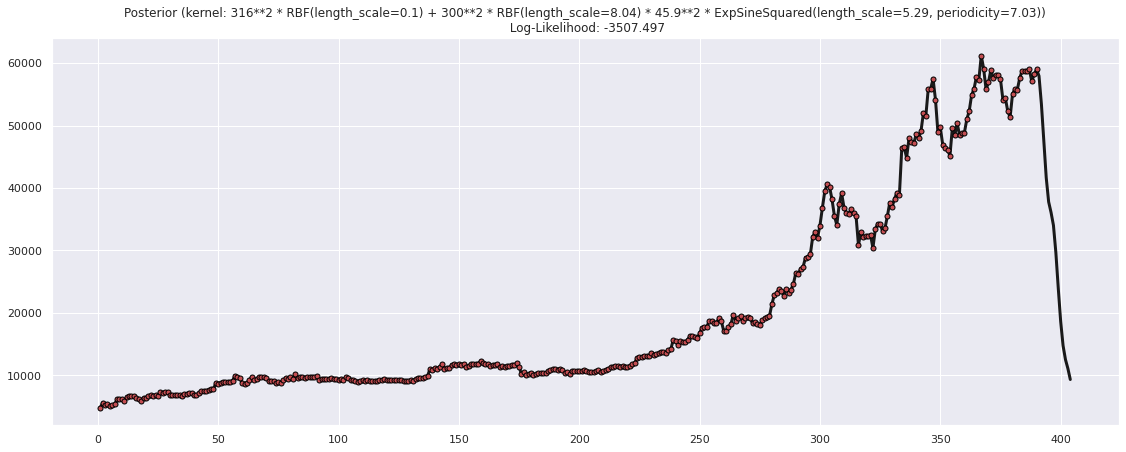

Random:  5


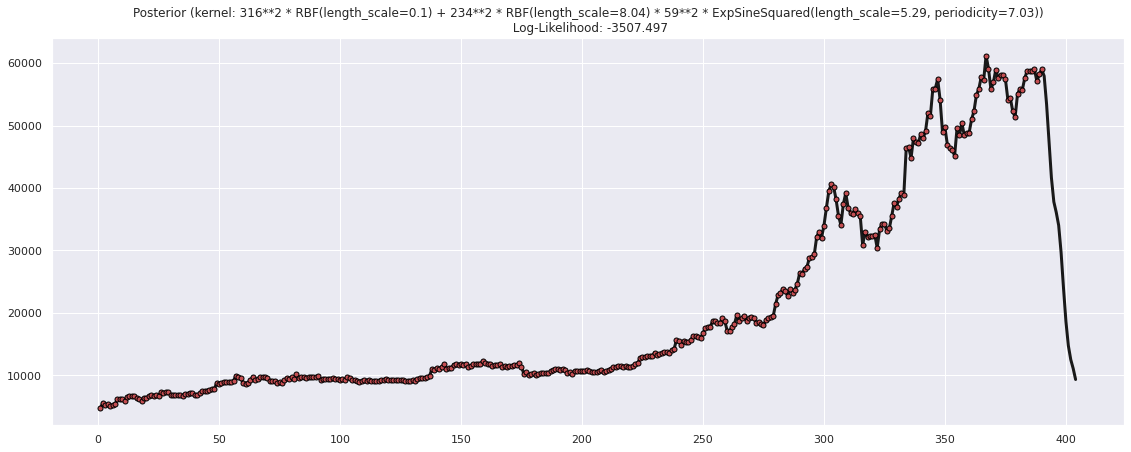

Random:  0


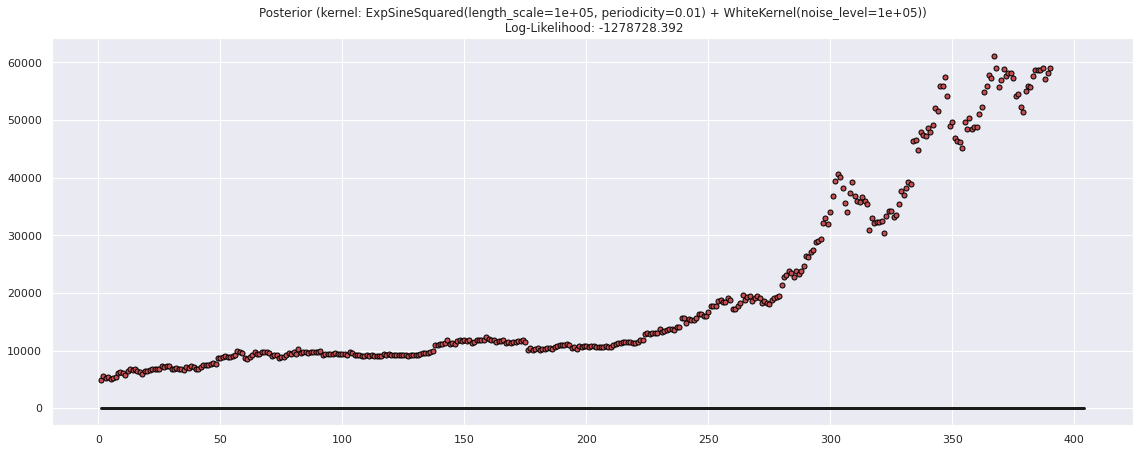

Random:  1


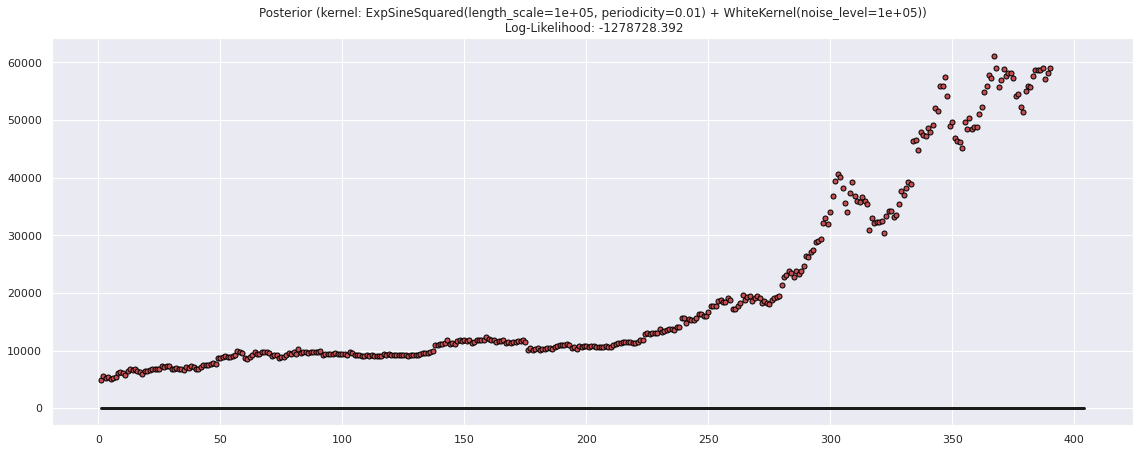

Random:  2


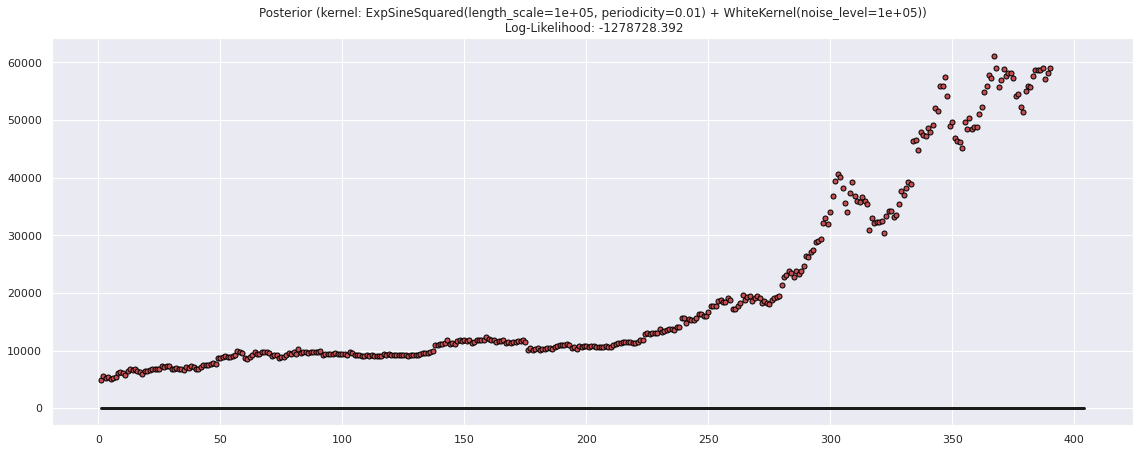

Random:  3


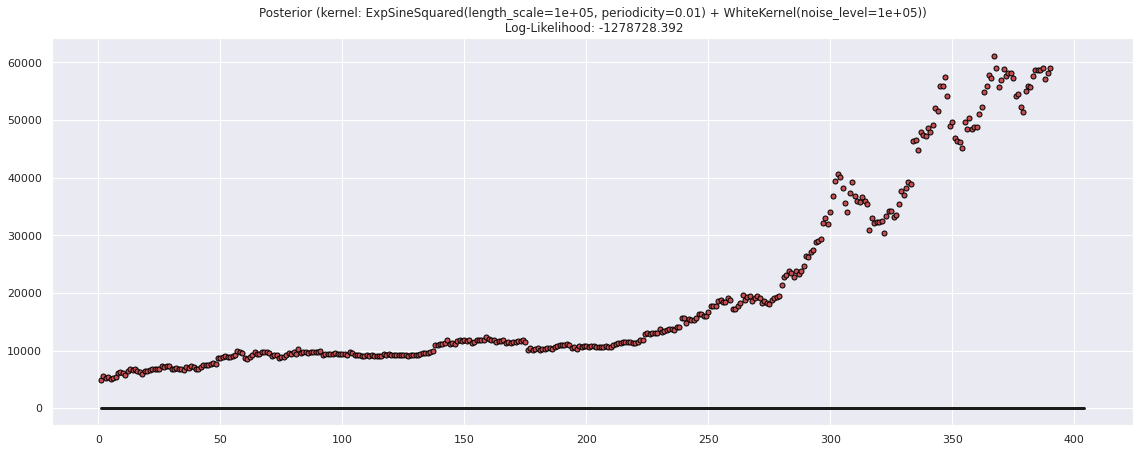

Random:  4


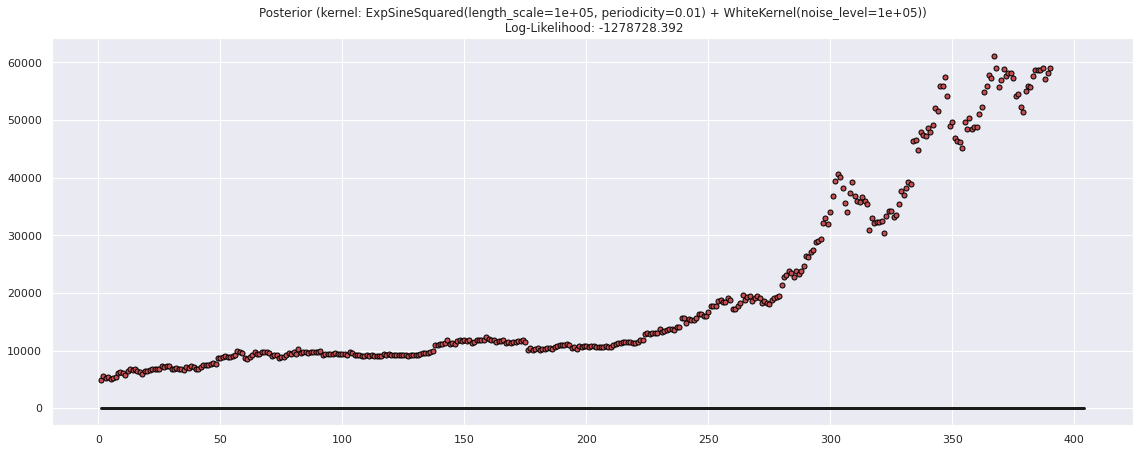

Random:  5


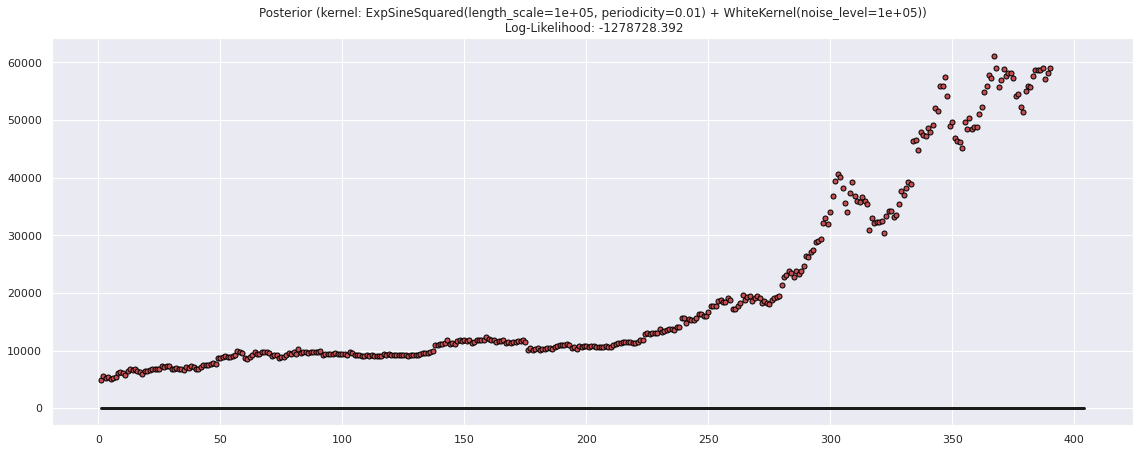

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic as RQ, \
                                            ExpSineSquared as Exp, DotProduct, \
                                              ConstantKernel, WhiteKernel, ConstantKernel as C

kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           
           1.0 * RQ(length_scale=1.0, alpha=0.1),

           1.0 * Exp(length_scale=0.1, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           
           1.0*RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) *
           1.0 * Exp(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           
           1.0*RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) +
           1.0*RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) *
           1.0 * Exp(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           
           Exp(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) \
            + WhiteKernel(1e-1)         
            ]

for kernel in kernels:
    for random in range(6):
        print("Random: ", random)

        # Specify Gaussian Process
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, random_state=random)

        plt.figure(figsize=(16, 12))

        X = np.arange(1,391)[:, np.newaxis]
        y = np.array([float(i.replace(',', '')) for i in df['Price'].values.tolist()])
        rng = np.random.RandomState(4)
        gp.fit(X, y)

        plt.subplot(2, 1, 2)
        X_ = np.linspace(X.min(), X.max() + 14, len(X) + 14)
        y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
        plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
        plt.scatter(X[:, 0], y, c='r', s=25, zorder=10, edgecolors=(0, 0, 0))
        plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
                % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
                fontsize=12)
        plt.tight_layout()

        plt.show()

Many results were somehow weird when we consider that we are dealing with bitcoin.  Elliot's Wave theory [4] states that the price curve should look similar to waves. Looking at the graph, we can expect the three possible results:
 - a smooth increase in the curve slope.
 - a smooth decrease in the curve slope 
 - no change in the curve slope.

From the previous run, the Exponential Kernel (image reproduced right below) gave us the most reasonable result according to Elliot's theory. Thus we continued iterating over it with different parameters.

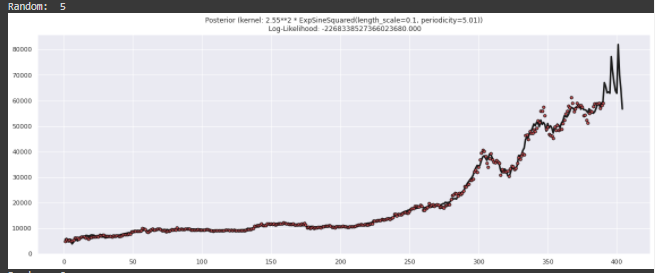

The next cell iterates through different factors.

Factor:  1.0


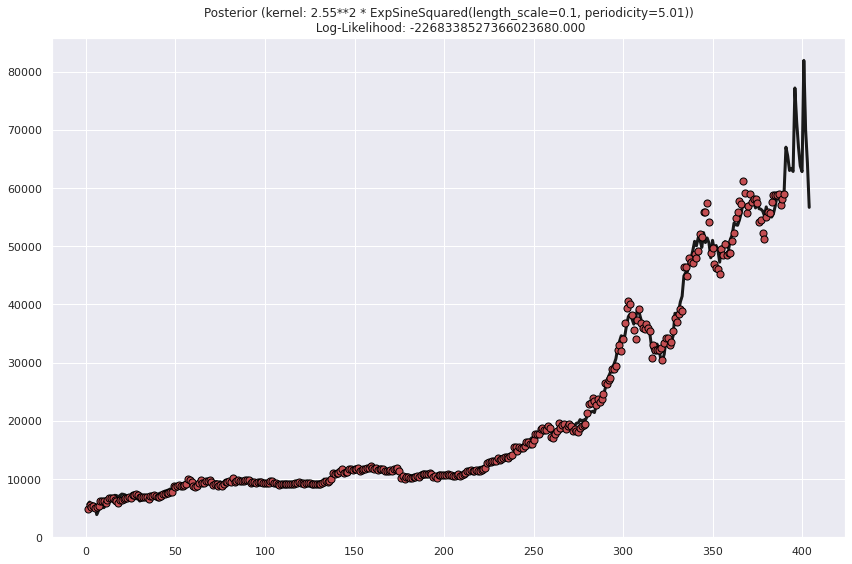

Factor:  2.0


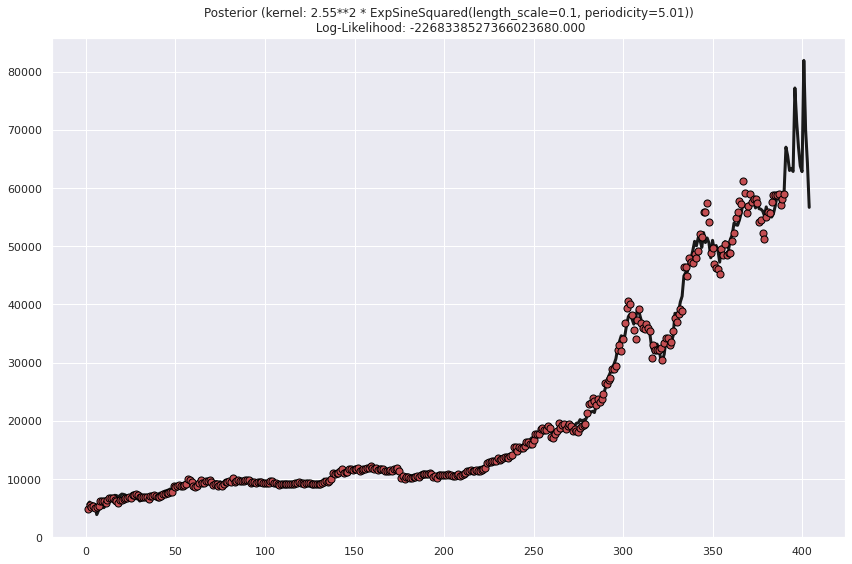

Factor:  3.0


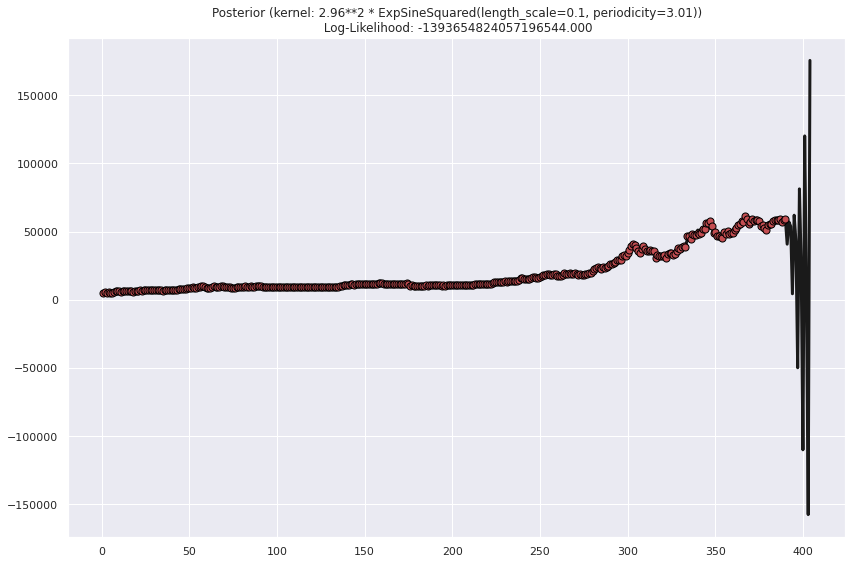

Factor:  4.0


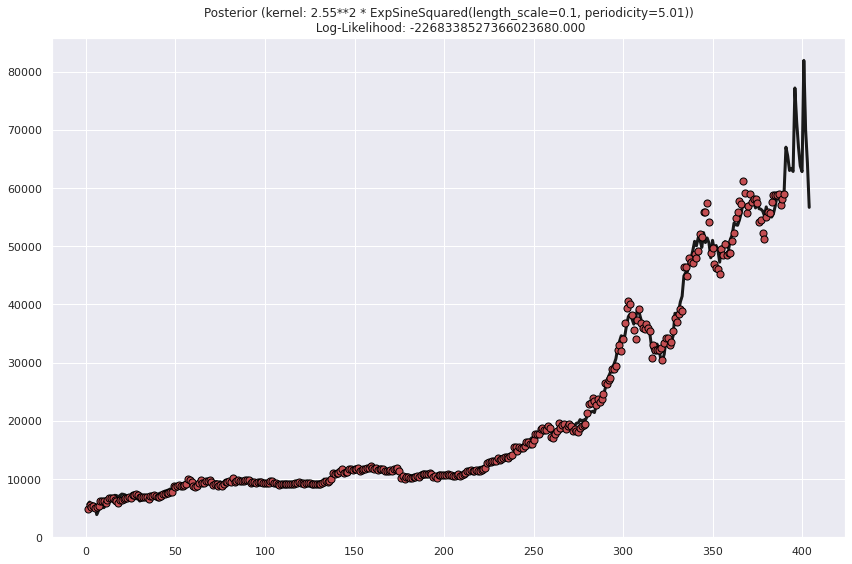

Factor:  5.0


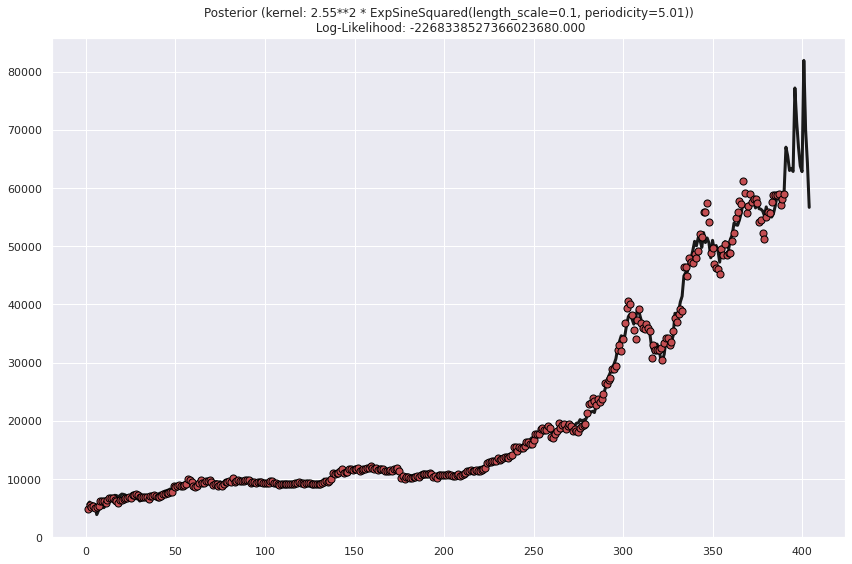

Factor:  6.0


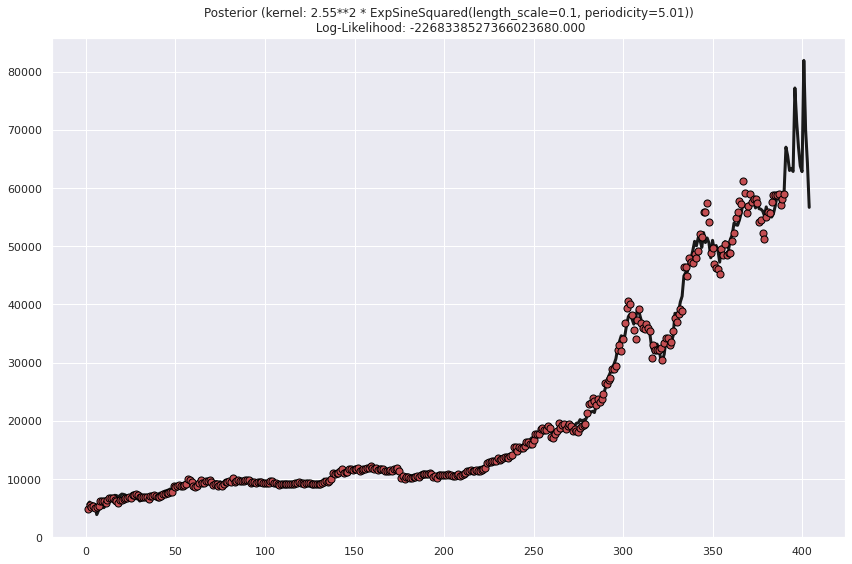

Factor:  7.0


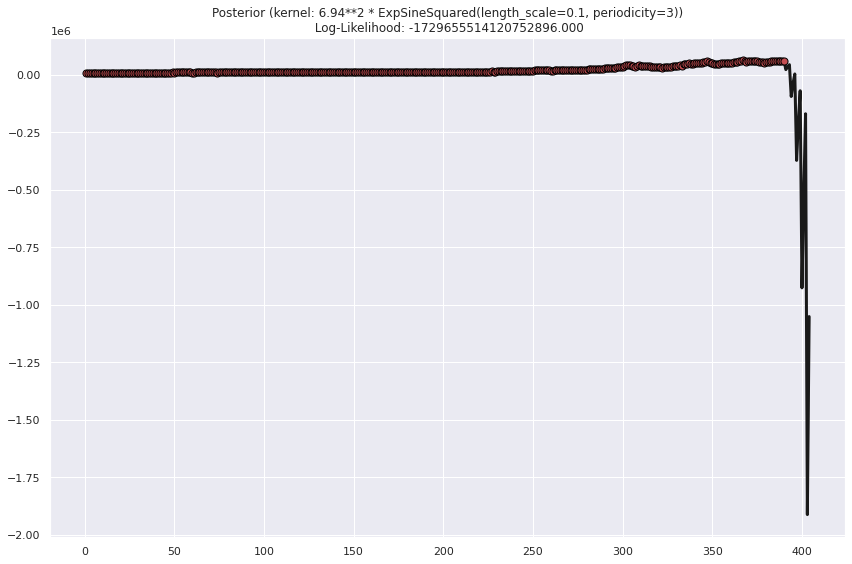

Factor:  8.0


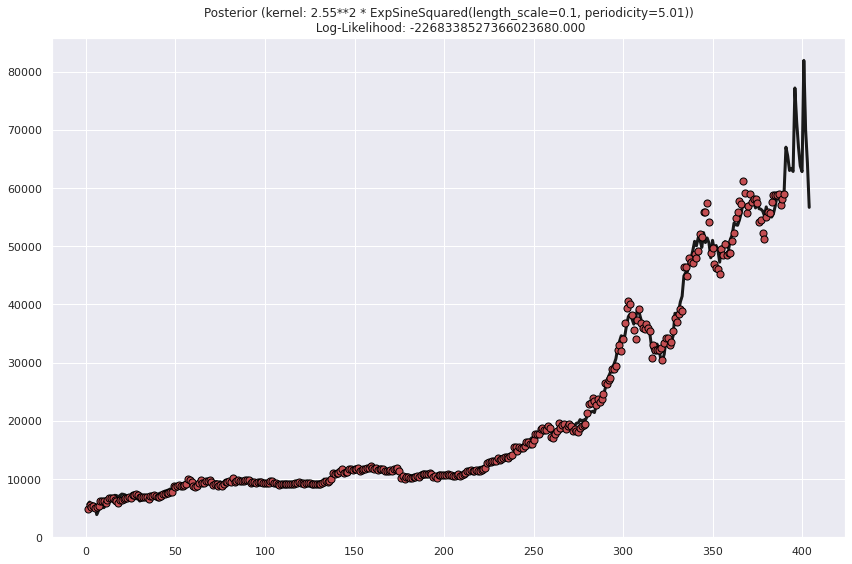

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared as Exp


for factor in range(1,9):
        print('Factor: ', float(factor))


        kernel = float(factor) **2 * Exp(length_scale=0.1, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0))
        
        # Specify Gaussian Process
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, random_state=5)

        # Generate data and fit GP

        X = np.arange(1,391)[:, np.newaxis]
        y = np.array([float(i.replace(',', '')) for i in df['Price'].values.tolist()])
        
        gp.fit(X, y)

        # Plot posterior
        plt.figure(figsize=(12, 8))

        X_ = np.linspace(X.min(), X.max() + 14, len(X) + 14)
        y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
        plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
        plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                        alpha=0.2, color='k')

        y_samples = gp.sample_y(X_[:, np.newaxis], 10)
        plt.plot(X_, y_samples, lw=1)
        plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
        plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
                % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
                fontsize=12)
        plt.tight_layout()

        plt.show()

As most outcomes did not show any improvement, the final kernel is:

 - "2.55**2 * ExpSineSquared(length_scale=0.1, periodicity=5.01)

The following cell will isolate the final GPR result.

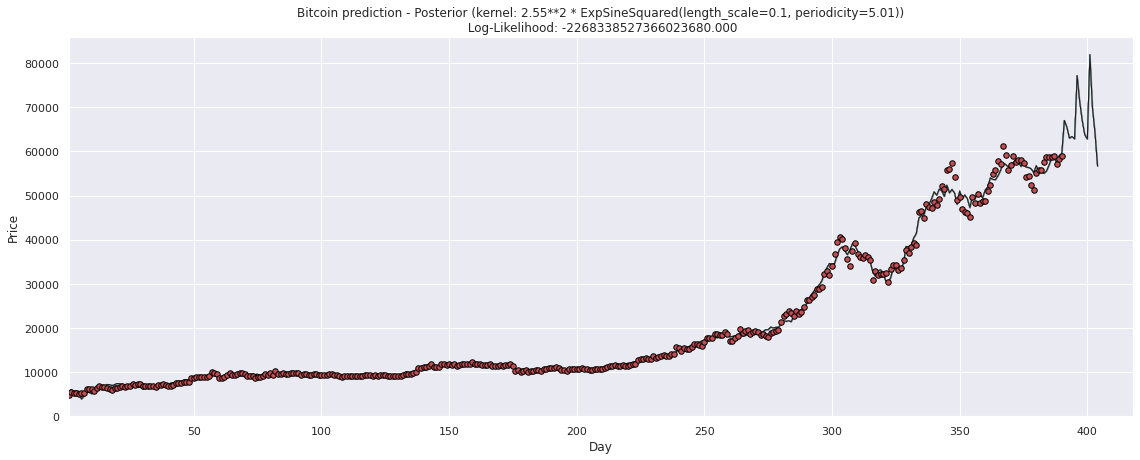

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared as Exp


kernels = 2.55**2 * Exp(length_scale=0.1, periodicity=5.01)

# Specify Gaussian Process
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, random_state=5)


plt.figure(figsize=(16, 12))

# Generate data and fit GP

X = np.linspace(1, 390, 390)[:, np.newaxis]
y = np.array([float(i.replace(',', '')) for i in df['Price'].values.tolist()])
gp.fit(X, y)


plt.subplot(2, 1, 2) 

X_ = np.linspace(X.min(), X.max() + 14, len(X)+14)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=1, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                        alpha=0.2, color='k')

y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.scatter(X[:, 0], y, c='r', s=30, zorder=10, edgecolors=(0, 0, 0))

plt.xlabel("Day")
plt.ylabel("Price")
plt.title(r"Bitcoin prediction")
plt.title("Bitcoin prediction - Posterior (kernel: %s)\n Log-Likelihood: %.3f"
                % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
                fontsize=12)
plt.xlim(X_.min(), X_.max()+14)
plt.tight_layout()

plt.show()

# 3. Kernel Ridge Regression

Similarly to GPR we will iterate different parameters in Kernel Ridge Regression.

In our experiment, we had two different, yet logical, results. They can be seen in the two next sequenctial plots.

Their outcomes were stored in the variables:
    - y_kr_1
    - y_kr_2

A visual analysis reveals that the second plot has a more smoothed curve and that the first one is more correlated to Elliot's theory. Thus, our decision is to take the first plot.



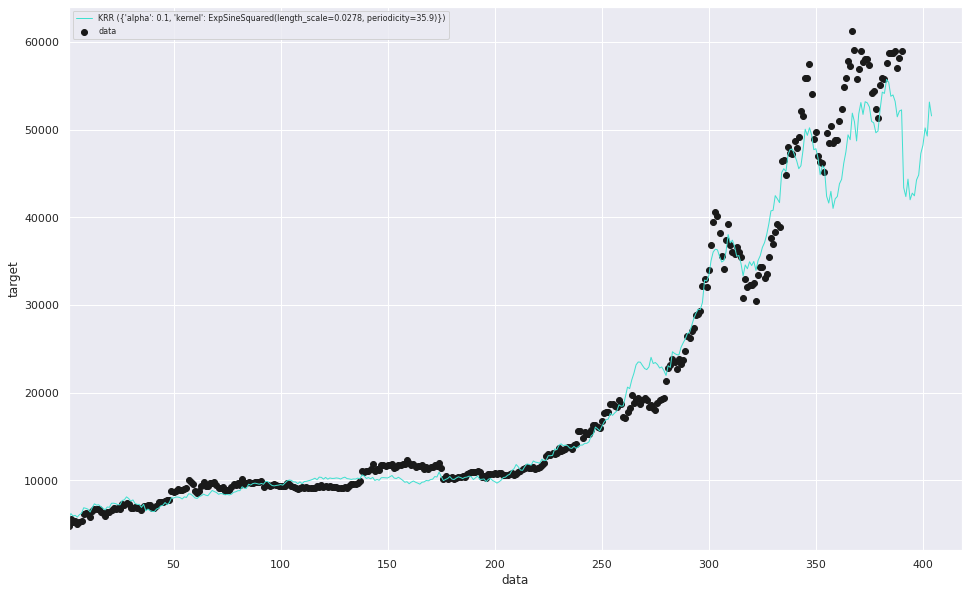

In [ ]:
# Plot 1
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

rng = np.random.RandomState(0)
X = np.arange(1,391)[:, np.newaxis]
y = np.array([float(i.replace(',', '')) for i in df['Price'].values.tolist()])

param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}

kr = GridSearchCV(KernelRidge(), param_grid=param_grid)
kr.fit(X, y)

X_plot = np.linspace(X.min(), X.max() + 14, len(X)+14)[:, None]
y_kr_1 = kr.predict(X_plot)

# Plot results
plt.figure(figsize=(16, 10))
lw = 1

plt.scatter(X, y, c='k', label='data')
plt.plot(X_plot, y_kr_1, color='turquoise', lw=lw,
         label='KRR (%s)' % kr.best_params_)

plt.xlabel('data')
plt.ylabel('target')
plt.xlim(X_plot.min(), X_plot.max()+14)

plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()

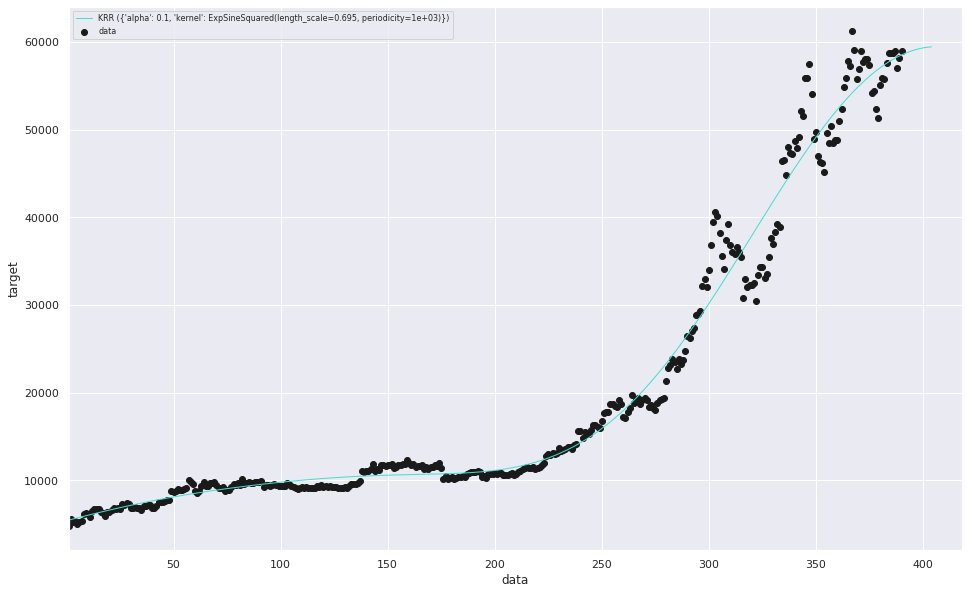

In [ ]:
# Plot 2
rng = np.random.RandomState(0)

X = np.arange(1,391)[:, np.newaxis]
y = np.array([float(i.replace(',', '')) for i in df['Price'].values.tolist()])

param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3, 1e-4],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-3, 3, 20)
                         for p in np.logspace(0, 3, 20)]}

kr = GridSearchCV(KernelRidge(), param_grid=param_grid)
kr.fit(X, y)

X_plot = np.linspace(X.min(), X.max() + 14, len(X)+14)[:, None]
y_kr_2 = kr.predict(X_plot)

# Plot results
plt.figure(figsize=(16, 10))
lw = 1

plt.scatter(X, y, c='k', label='data')
plt.plot(X_plot, y_kr_2, color='turquoise', lw=lw,
         label='KRR (%s)' % kr.best_params_)

plt.xlabel('data')
plt.ylabel('target')
plt.xlim(X_plot.min(), X_plot.max()+14)

plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()

# 4. Comparing GPR against KRR

As both GPR and KRR provided reasonable results, we will compare calculate the error between their outputs and the real value using the Euclidian distance.

The Dahia's 'cal_error' function [5] calculates the Euclidian distance. The result are stored in 'krr_error' and 'gpr_error', and then plot using 'plot_error' function

In [ ]:
import math
def cal_error(y_t,y_p):
  error=[]
  for i in range(len(y_t)):
    e = math.sqrt((y_t[i] - y_p[i])**2)
    error.append(e)
  error=np.array(error)
  error.reshape(-1,1)
  return error

In [ ]:
t = np.linspace(X.min(), X.max() + 14, len(X)+14)
y = np.array([float(i.replace(',', '')) for i in df['Price'].values.tolist()])

krr_error = cal_error(y, y_kr_1)
gpr_error = cal_error(y, y_mean)

In [ ]:
def sort_tuple(tup): 
    return(sorted(tup, key = lambda x: x[0]))  

In [ ]:
def plot_error(krr_error, gpr_error):

    my_list = []
    for i in range(len(gpr_error)):
        my_list.append((t[i], gpr_error[i]))
    sorted = sort_tuple(my_list)
    x_gpr = []
    y_gpr = []
    for i in range(len((sorted))):
        x_gpr.append(sorted[i][0])
        y_gpr.append(sorted[i][1])
    
    my_list = []
    for i in range(len(krr_error)):
        my_list.append((t[i], krr_error[i]))
    sorted = sort_tuple(my_list)
    x_krr = []
    y_krr = []
    for i in range(len((sorted))):
        x_krr.append(sorted[i][0])
        y_krr.append(sorted[i][1])


    plt.plot(x_gpr, y_gpr)

    plt.plot(x_krr, y_krr)

The function 'plot_error' in the next cell shows that the higher the price for KRR (orange), the higher the error. 

On the other hand, for GPR (blue), the error is constantly near zero.

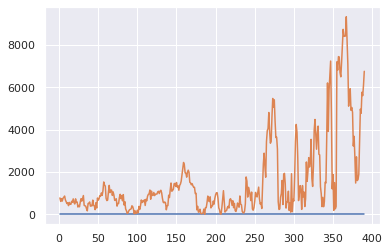

In [ ]:
plot_error(krr_error, gpr_error)

# 5. Tsmooth

Tsmoothie is a python library designed to smooth timeseries data and for outlier detection [6]. Although it can not perform prediction tasks, we will demonstrate how we can smooth the data.

The next cells demonstrate how we can smooth Bitcoin's timeseries data using two different Seasonal Decompose Smoothing kinds: Convolution and Lowess.

Note how Lowess smoothed the timeseries data way more than Convolution.

In [ ]:
# Installing Tsmoothie
!pip install tsmoothie

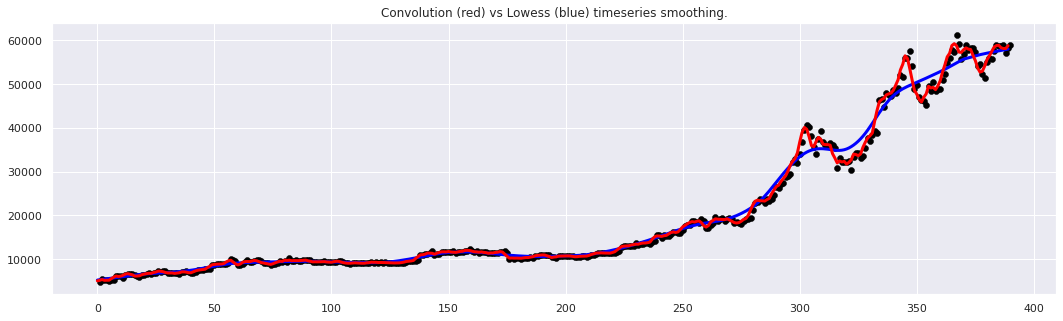

In [ ]:
# import libraries
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother, ConvolutionSmoother

x = np.arange(1,391)
data = np.array([float(i.replace(',', '')) for i in df['Price'].values.tolist()])

# Seasonal Decompose Smoothing
smoother_low = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother_con = ConvolutionSmoother(window_len=2, window_type='ones')
smoother_low.smooth(data)
smoother_con.smooth(data)

# generate intervals
low_lo, up_lo = smoother_low.get_intervals('prediction_interval')
low_con, up_con = smoother_con.get_intervals('sigma_interval',  n_sigma=1)

# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))
plt.scatter(x, data, c='black', lw=0.5)
plt.plot(smoother_low.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother_con.smooth_data[0], linewidth=3, color='red')
plt.title("Convolution (red) vs Lowess (blue) timeseries smoothing.")
plt.show()

# 6. Prediction with ARIMA from StatsModel

As bitcoin data is a time series dataset, we can apply ARIMA from the Statsmodel library. 

ARIMA stands for Autoregressive Integrated Moving Average, and we will leverage it to forecast Bitcoin values using [7] as a reference.

In [ ]:
# Installing StatsModel library
!pip install statsmodels

In [ ]:
# Importing required libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

If not able to run "from statsmodels.tsa.arima.model import ARIMA", please:

 - uncomment the next cell and run it
 - restart runtime
 - import again the libraries in the previous cell.

In [ ]:
# !pip install --upgrade --no-deps statsmodels

     |████████████████████████████████| 9.5MB 5.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


P, q, and d values are parameters to feed the ARIMA algorithm. Their descriptions are as follow:
 - p: number of lags, AR terms
 - d: order of differencing
 - q: number of lagged forecast errors, MA terms.

Before finding p, d and q values, we need to convert the "Date" column values into DateTime objects. The code below demonstrates how.

In [ ]:
def convert_to_datetime(text):
    text = text.split('-')
    text = "{} {} 20{}".format(text[0], text[1], text[2])
    text = pd.to_datetime(text, format="%d %b %Y")
    return text

In [ ]:
# Converting date values into datetime object
df['datetime'] = df['Date'].apply(lambda x: convert_to_datetime(x))
df['price_float'] = np.array([float(i.replace(',', '')) for i in df['Price'].values.tolist()])

In [ ]:
# Assingning the time series to 'series' variable 
test = df.iloc[:,[2,3]]
test.set_index('datetime', inplace=True)
series = test['price_float']
series.index = series.index.to_period('D')

Now the data in a proper format, and we get StatsModel library installed, we can proceed to find out if the time series is stationary or non-stationary. 

To do so, we run the 'adfuller' function, which calculates the statistic p-value. If the p-value is lower than 0.05, then we have a stationary time series. Otherwise, we will have non-stationary data, and we need to differentiate it to find the required parameters.

In [ ]:
# Printing the statistic p-value
print("p-value:", adfuller(series.dropna())[1])

p-value: 0.9988774399887226


From the result above, we conclude that we have to differentiate the time series. 

The function 'plot_acf' plots the time series differentiate with the help of diff() method. To find out how many diff() need to be applied and find the value of d, all lags, except the first one, cannot be far beyond the confidence level (the blue area).

It is easy to see that, in the '1st Order differencing', we have all the lags under the confidence level. Thus, the 2nd ad 3rd differencing plots are not necessary. With that, we conclude that the time series is stationary at the 1st order differencing. Thus d = 1.

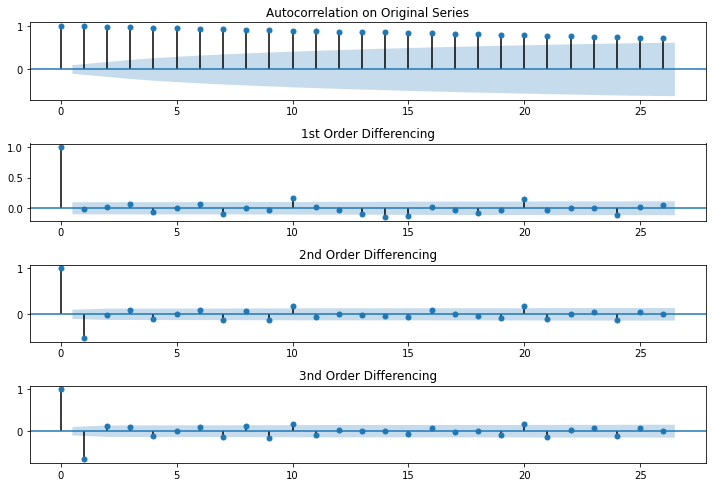

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(611)
fig = plot_acf(series, ax=ax1, title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(612)
fig = plot_acf(series.diff().dropna(), ax=ax2, title="1st Order Differencing")
ax3 = fig.add_subplot(613)
fig = plot_acf(series.diff().diff().dropna(), ax=ax3, title="2nd Order Differencing")
ax4 = fig.add_subplot(614)
fig = plot_acf(series.diff().diff().diff().dropna(), ax=ax4, title="3nd Order Differencing")
plt.tight_layout()
plt.show()

To find the 'p' value, we need to differentiate the time series, apply the partial autocorrelation function ('plot_pacf'), and count the number of lags far above the confidence level.

From the plot below, only the first lag is far above the confidence level. Thus p = 1.

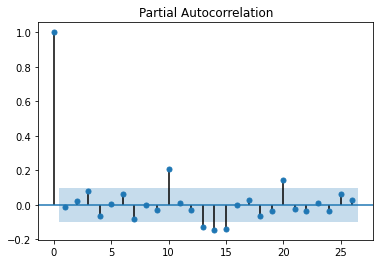

In [ ]:
plot_pacf(series.diff().dropna(), lags=26) #knowing d=1 we apply diff() once
plt.show()

Finally, we can determine the q value by plotting the Autocorrelation function. Again, we will count the number of lags that is significantly higher than the confidence level.

From the plot, we can see again that only the first lag is above the confidence level. Hence, q = 1.

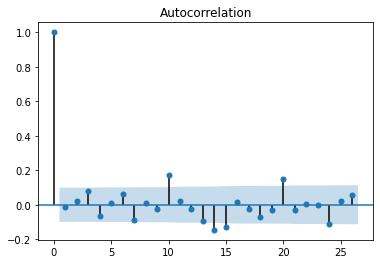

In [ ]:
plot_acf(series.diff().dropna())
plt.show()

In this last part, we fed ARIMA with the data, set the p,q, and d, values, predicted the values for the next 14 days. The results demonstrated an upward straight line trend within a delimited confidence level area represented in gray colour. To a certain extent, these results are correlated to the final GPR outcome.

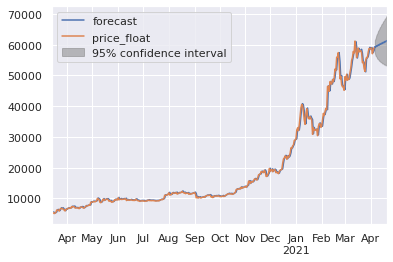

In [ ]:
sns.set()

# Reloding the time series values
df = pd.read_csv('/content/drive/My Drive/DV_final_assignment/Bitcoin.csv')
df['datetime'] = df['Date'].apply(lambda x: convert_to_datetime(x))
df['price_float'] = np.array([float(i.replace(',', '')) for i in df['Price'].values.tolist()])

# ---------------------------------- ARIMA ---------------------------
test = df.iloc[:,[2,3]]
test.set_index('datetime', inplace=True)
series = test['price_float']
series.index = series.index.to_period('D')

model = ARIMA(series, order=(1, 1, 1))
results = model.fit()
results.summary()
graph = results.plot_predict(1, 404)
plt.show()

# 7. Conclusion


This work has demonstrated that both Kernel Ridge Regression and Gaussian Process Regression models conveyed good results. However, tuning their parameters has demonstrated to be a long time-consuming interactive process. Also, defining which kernels and what kernels combination ones can use is a crucial step.  

Although the Tsmoothie library is used only for smoothing the data, it can be valuable as a preprocessing step in building predictive models. Future works can consider comparing the current results against new KRR and GPR predictions with smoothed data.

ARIMA seemed to be a more straightforward approach than KRR and GPR. However, it showed an upward straight line within a confidence interval, which does not correctly represent the stock price movement. In that sense, we could say that KRR and GPR are more aligned with Elliott's Wave Theory[4].

# 8. References

[1] https://www.udemy.com/course/gaussian-process-regression-fundamentals-and-application/

[2] https://arxiv.org/abs/1302.4922

[3] https://arxiv.org/pdf/2009.10862.pdf

[4] https://en.wikipedia.org/wiki/Elliott_wave_principle

[5] https://colab.research.google.com/drive/1wnxfWGlXHZ58lBTeE95vAUPL132Xt7Tm

[6] https://pypi.org/project/tsmoothie/

[7] https://towardsdatascience.com/arima-forecasting-in-python-90d36c2246d3

